Assignment 2
Nathan Caplan

In [2]:
#import libraries
from __future__ import print_function
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
#Download Reservoir csv file
!curl https://data.cityofnewyork.us/api/views/zkky-n5j3/rows.csv?accessType=DOWNLOAD > Current_Reservoir_Levels.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  470k    0  470k    0     0   803k      0 --:--:-- --:--:-- --:--:--  802k


In [4]:
#Test environmental variable 
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /Users/nathancaplan/Documents/NYU_CUSP/Fall_2018/PUI/PUIDATA


In [5]:
#Move file to proper directory
!mv Current_Reservoir_Levels.csv $PUIDATA

In [6]:
#Make sure it is there
!ls $PUIDATA

Current_Reservoir_Levels.JSON Current_Reservoir_Levels.csv


In [7]:
#Read the file
CRL = pd.read_csv("%s/Current_Reservoir_Levels.csv"%os.getenv("PUIDATA"))

In [8]:
#See the top 7 rows
CRL.head(7)

,Date,Ashokan East Storage,Ashokan East Elevation,Ashokan West Storage,Ashokan West Elevation,Schoharie Storage,Schoharie Elevation,Rondout Storage,Rondout Elevation,Neversink Storage,Neversink Elevation,Pepacton Storage,Pepacton Elevation,Cannonsville Storage,Cannonsville Elevation
0,11/01/2017,65.36,577.86,36.34,577.89,12.92,1109.86,47.26,835.85,30.74,1430.03,116.60,1264.45,47.69,1112.87
1,11/02/2017,64.95,577.58,36.82,578.59,13.28,1111.05,47.32,835.94,30.68,1429.90,116.87,1264.61,48.20,1113.33
2,11/03/2017,64.36,577.31,37.18,579.14,13.56,1111.97,47.22,835.79,30.72,1429.99,117.08,1264.74,48.66,1113.74
3,11/04/2017,63.71,576.94,37.49,579.56,13.78,1112.73,47.28,835.88,30.83,1430.22,117.15,1264.78,49.05,1114.09
4,11/05/2017,63.15,576.52,37.78,579.92,13.98,1113.39,47.36,836.00,30.94,1430.47,117.11,1264.76,49.35,1114.36
5,11/06/2017,62.53,576.14,38.04,580.24,14.19,1114.04,47.46,836.14,31.07,1430.75,117.23,1264.83,49.75,1114.72
6,11/07/2017,61.92,575.75,38.28,580.52,14.38,1114.66,47.50,836.21,31.19,1431.01,117.20,1264.81,50.13,1115.06


In [9]:
#See the bottom three rows
CRL.tail(3)

,Date,Ashokan East Storage,Ashokan East Elevation,Ashokan West Storage,Ashokan West Elevation,Schoharie Storage,Schoharie Elevation,Rondout Storage,Rondout Elevation,Neversink Storage,Neversink Elevation,Pepacton Storage,Pepacton Elevation,Cannonsville Storage,Cannonsville Elevation
4579,08/29/2018,75.79,585.80,42.92,588.14,18.39,1130.12,48.03,837.81,35.16,1439.99,140.09,1278.52,91.78,1148.26
4580,08/30/2018,75.17,585.43,42.48,587.76,18.37,1130.13,47.93,837.67,35.13,1439.92,139.42,1278.16,91.19,1147.86
4581,08/31/2018,74.57,585.05,42.18,587.31,18.17,1129.93,47.77,837.43,35.11,1439.89,138.75,1277.79,90.55,1147.43


In [10]:
#Show column titles
CRL.columns

Index([u'Date              ', u'Ashokan East Storage',
       u'Ashokan East Elevation', u'Ashokan West Storage',
       u'Ashokan West Elevation', u'Schoharie Storage', u'Schoharie Elevation',
       u'Rondout Storage', u'Rondout Elevation', u'Neversink Storage',
       u'Neversink Elevation', u'Pepacton Storage', u'Pepacton Elevation',
       u'Cannonsville Storage', u'Cannonsville Elevation'],
      dtype='object')

In [23]:
#Remove columns of no interest
New_CRL = CRL.drop(columns=[u'Date              ',u'Ashokan West Storage',
       u'Ashokan West Elevation', u'Schoharie Storage', u'Schoharie Elevation',
       u'Rondout Storage', u'Rondout Elevation', u'Neversink Storage',
       u'Neversink Elevation', u'Pepacton Storage', u'Pepacton Elevation',
       u'Cannonsville Storage', u'Cannonsville Elevation'])
New_CRL.head(7)

,Ashokan East Storage,Ashokan East Elevation
0,65.36,577.86
1,64.95,577.58
2,64.36,577.31
3,63.71,576.94
4,63.15,576.52
5,62.53,576.14
6,61.92,575.75


In [21]:
#Put the data into numpy arrays and reshape them to 2-Dimensional
AWS = CRL[u'Ashokan East Storage']
AWE = CRL[u'Ashokan East Elevation']
AWS_array = np.array(AWS)
AWE_array = np.array(AWE)
new_AWS = np.reshape(AWS_array,[-1,1])
new_AWE = np.reshape(AWE_array,[-1,1])

Text(0.5,1,'Ashokan West Reservoir Capacity vs. Time')

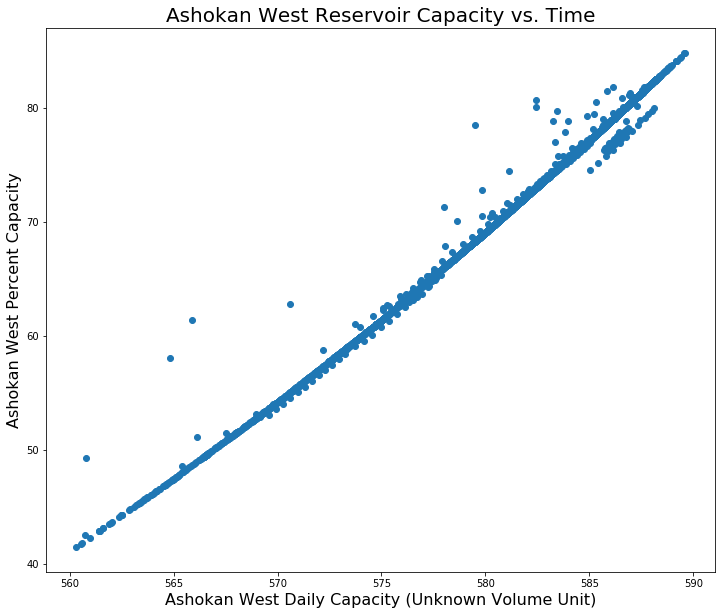

In [22]:
#Scatter Plot the data
figure, ax = plt.subplots(figsize=(12, 10))
plt.xlabel('Ashokan West Daily Capacity (Unknown Volume Unit)', fontsize = 16)
plt.ylabel('Ashokan West Percent Capacity', fontsize = 16)
plt.scatter(new_AWE,new_AWS)
plt.title('Ashokan West Reservoir Capacity vs. Time', fontsize = 20)

### Figure 1 shows the percentage Ashokan West Capacity over the Ashokan West Daily Capaicty. There appears to be a strong linear relation between the two. One thing to note is that the capacity volume units are unavailable and are not provided by NYC open data. 